In [1]:
"""Use GMRES and augmented least squares to find optimal Tikhonov regularisation"""

'Use GMRES and augmented least squares to find optimal Tikhonov regularisation'

In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

from deblurring.blurring import blur_and_noise
from solvers.least_square import GMRESSolver, LSQRSolver
from common.operators import derivative_operator, identity_operator
from evaluation.tuning import StandardTuner

Estimated noise variance 0.00039914875201466516 vs. actual 0.0004


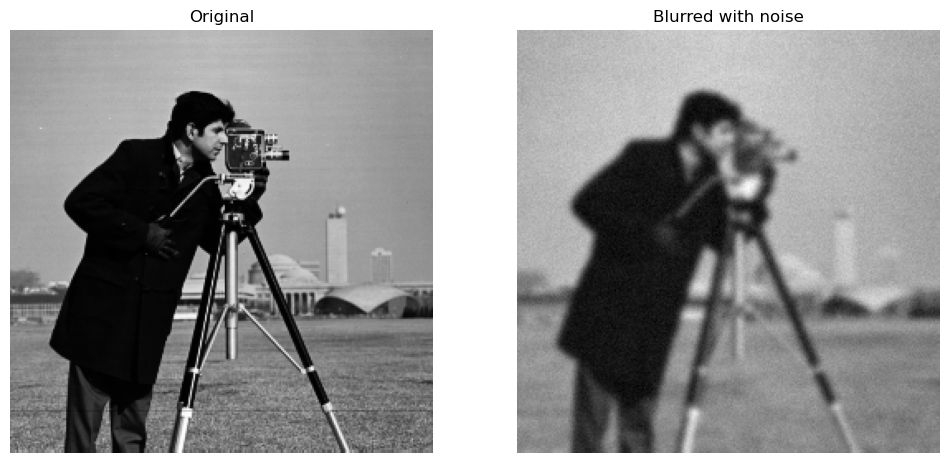

In [3]:
"""Read image and blur with added noise"""

f = plt.imread("../../data/Cameraman256.png")
f = (f - f.min()) / (f.max() - f.min())

theta = 0.02
sigma = 2.0
kernel = partial(gaussian_filter, sigma=sigma)
g = blur_and_noise(f, kernel, theta)
noise_variance = np.var(blur_and_noise(np.zeros_like(g), kernel, theta))
print(f"Estimated noise variance {noise_variance} vs. actual {np.square(theta)}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(f, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(g, cmap="gray")
plt.axis("off")
plt.title("Blurred with noise")
plt.show()

In [4]:
"""Set up parameters, regularisation operators and tuners"""

alphas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]

gmres_tuner = StandardTuner(
    solver=GMRESSolver,
    g=g,
    A=kernel,
    noise_variance=noise_variance,
    f=f,
)

lsqr_tuner = StandardTuner(
    solver=LSQRSolver,
    g=g,
    A=kernel,
    noise_variance=noise_variance,
    f=f,
)

[INFO] 2025-02-25 20:38:15 | Alpha 1e-08: discrepancy -0.00010808173162761797 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:39:13 | Alpha 1e-07: discrepancy -0.00010780108927462532 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:39:50 | Alpha 1e-06: discrepancy -0.00010556686741098519 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:10 | Alpha 1e-05: discrepancy -9.680902205596101e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:14 | Alpha 0.0001: discrepancy -8.169306810942693e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:15 | Alpha 0.001: discrepancy -6.368211772251849e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:15 | Alpha 0.01: discrepancy -1.3943397476610692e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:15 | Alpha 0.1: discrepancy 0.0022747114224042015 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:15 | Alpha 1.0: discrep

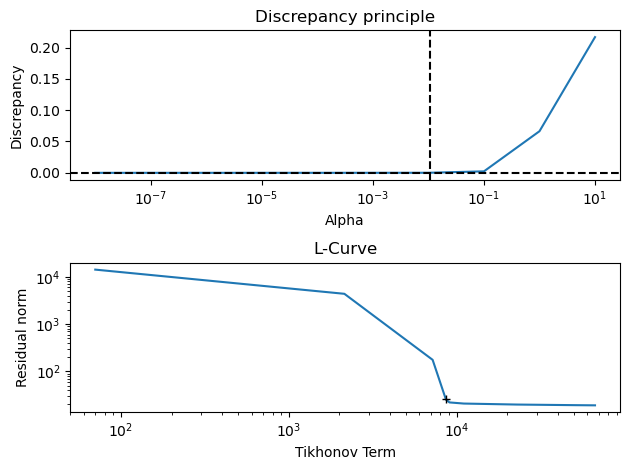

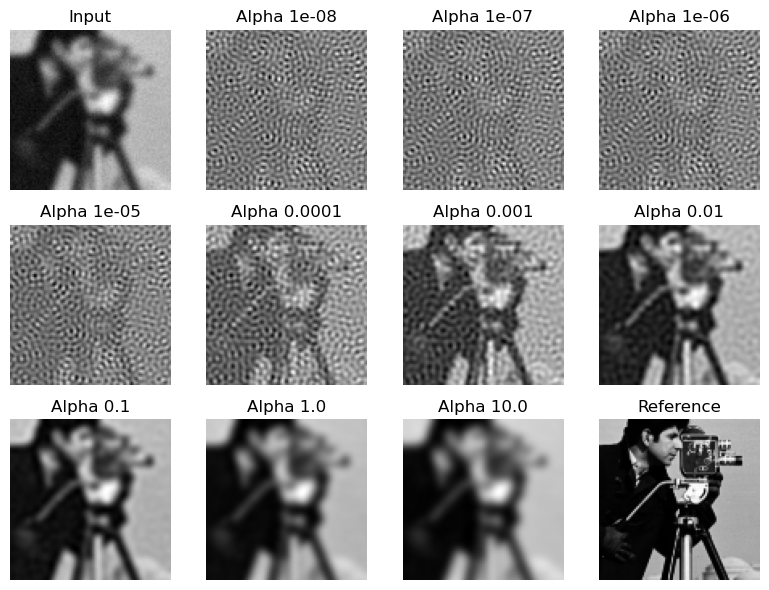

Optimal alpha: 0.010548315876205533
DP: -1.0178731037839431e-05, MSE: 0.004408285144900096


In [5]:
"""Find optimal alpha using GMRES and TK0"""

gmres_tuner.parameter_sweep(
    alphas=alphas,
    L_func=identity_operator,
    save_imgs=True,
)
gmres_tuner.display_metrics()
gmres_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {gmres_tuner.optimal_alpha}")
print(f"DP: {gmres_tuner.optimal_metrics['discrepancy']}, MSE: {gmres_tuner.optimal_metrics['MSE']}")
gmres_tk0_f_hat = gmres_tuner._optimal_f_hat

[INFO] 2025-02-25 20:40:18 | Alpha 1e-08: discrepancy -8.467365153670036e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:19 | Alpha 1e-07: discrepancy -8.467348117028678e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:20 | Alpha 1e-06: discrepancy -8.467066367888975e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:20 | Alpha 1e-05: discrepancy -8.456470903973011e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:21 | Alpha 0.0001: discrepancy -8.093422230831315e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:22 | Alpha 0.001: discrepancy -6.406705262722762e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:22 | Alpha 0.01: discrepancy -1.4003530730273051e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:23 | Alpha 0.1: discrepancy 0.0022747467020721845 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:40:23 | Alpha 1.0: discrepanc

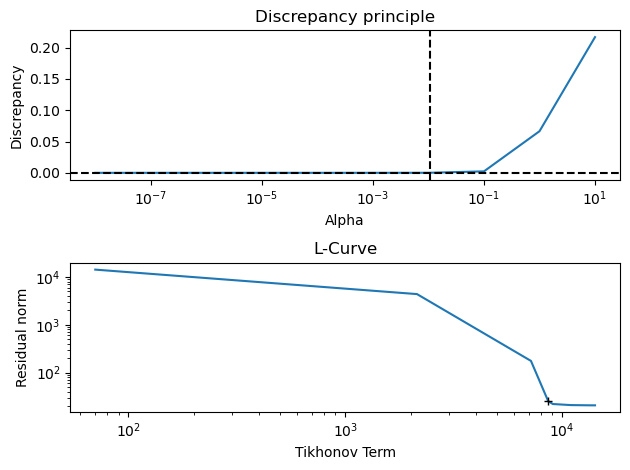

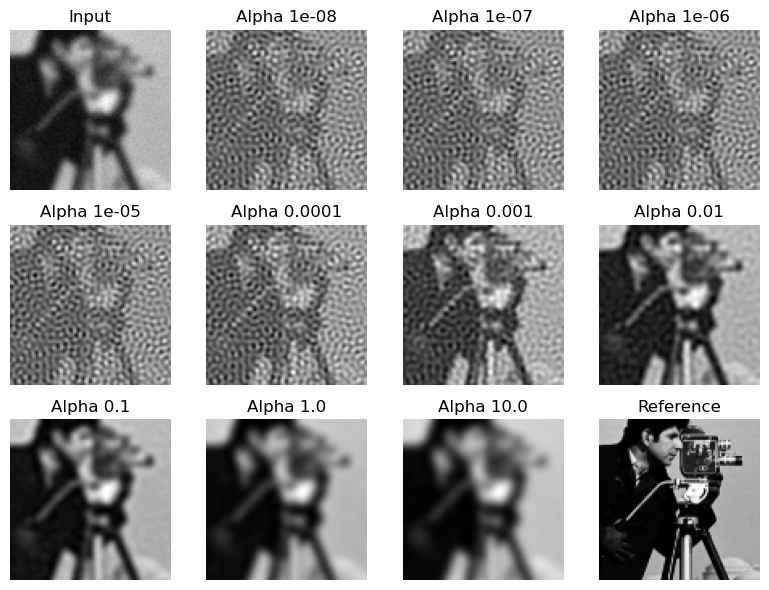

Optimal alpha: 0.010550657624262208
DP: -1.0223942758857052e-05, MSE: 0.004409015534570586


In [6]:
"""Find optimal alpha using LSQR and TK0"""

lsqr_tuner.parameter_sweep(
    alphas=alphas,
    L_func=identity_operator,
    save_imgs=True,
)
lsqr_tuner.display_metrics()
lsqr_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {lsqr_tuner.optimal_alpha}")
print(f"DP: {lsqr_tuner.optimal_metrics['discrepancy']}, MSE: {lsqr_tuner.optimal_metrics['MSE']}")
lsqr_tk0_f_hat = lsqr_tuner._optimal_f_hat

[INFO] 2025-02-25 20:41:10 | Alpha 1e-08: discrepancy -0.00010802865884878188 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:41:47 | Alpha 1e-07: discrepancy -0.00010731516413080294 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:15 | Alpha 1e-06: discrepancy -0.0001029395345431744 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:24 | Alpha 1e-05: discrepancy -9.16696620694809e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:27 | Alpha 0.0001: discrepancy -7.648818081681762e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:29 | Alpha 0.001: discrepancy -5.996710727173811e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:30 | Alpha 0.01: discrepancy -3.9876381094132104e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:31 | Alpha 0.1: discrepancy 1.6466871104118663e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:32 | Alpha 1.0: discrepa

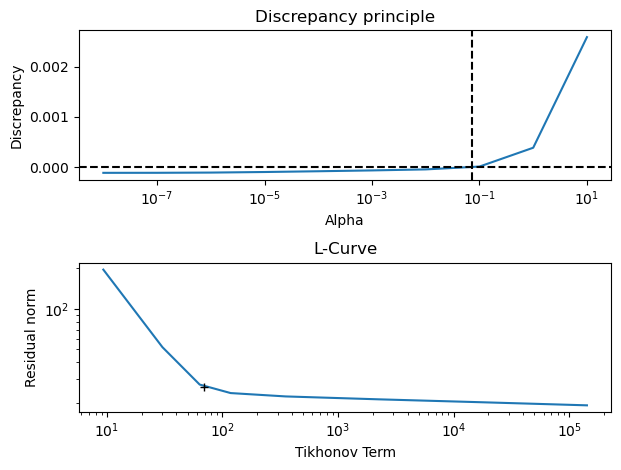

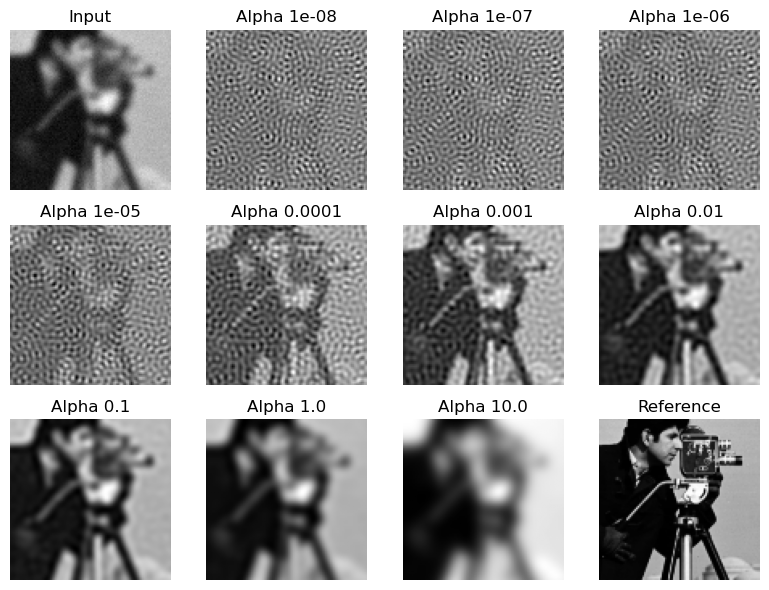

Optimal alpha: 0.07369661243273617
DP: 2.5698755244627793e-06, MSE: 0.004802666352945167


In [7]:
"""Find optimal alpha using GMRES and TK1"""
gmres_tuner.parameter_sweep(
    alphas=alphas,
    L_func=derivative_operator,
    save_imgs=True,
)
gmres_tuner.display_metrics()
gmres_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {gmres_tuner.optimal_alpha}")
print(f"DP: {gmres_tuner.optimal_metrics['discrepancy']}, MSE: {gmres_tuner.optimal_metrics['MSE']}")
gmres_tk1_f_hat = gmres_tuner._optimal_f_hat

[INFO] 2025-02-25 20:42:39 | Alpha 1e-08: discrepancy -8.467351817172244e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:40 | Alpha 1e-07: discrepancy -8.467212177576031e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:42 | Alpha 1e-06: discrepancy -8.465458002745454e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:44 | Alpha 1e-05: discrepancy -8.421428081314969e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:45 | Alpha 0.0001: discrepancy -7.69560392525586e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:47 | Alpha 0.001: discrepancy -6.0262107087785417e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:48 | Alpha 0.01: discrepancy -3.994647909187198e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:49 | Alpha 0.1: discrepancy 1.6453031590966483e-05 | evaluation.eval_metrics-log_metrics:209
[INFO] 2025-02-25 20:42:50 | Alpha 1.0: discrepanc

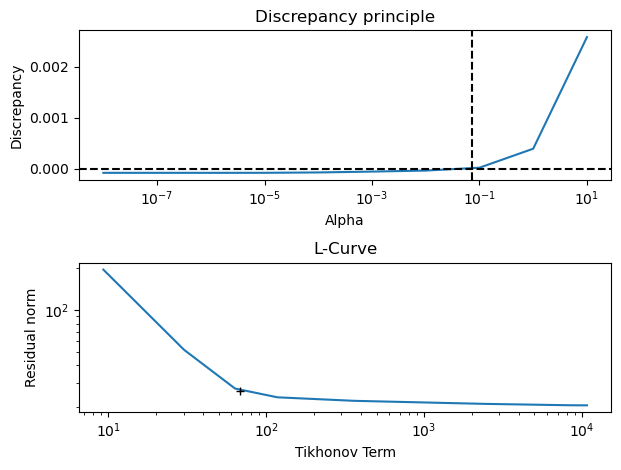

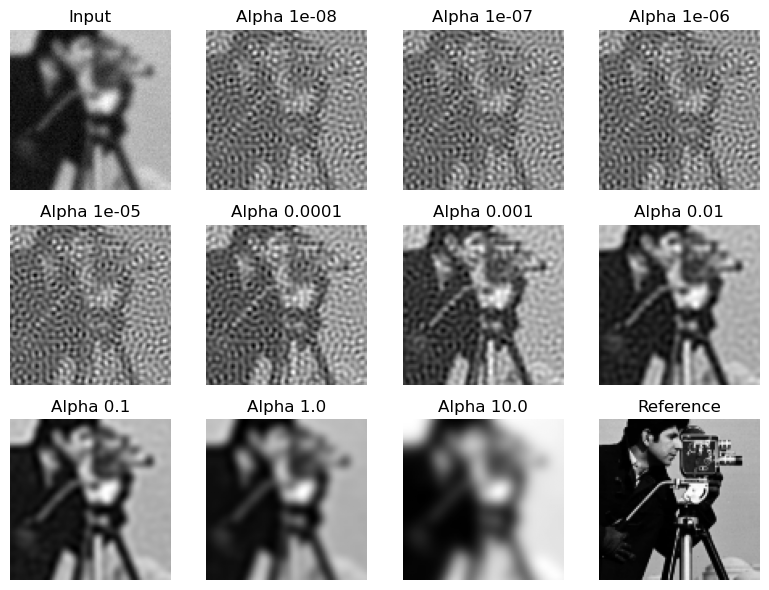

Optimal alpha: 0.07374493457019371
DP: 2.576535683677006e-06, MSE: 0.004802360075127639


In [8]:
"""Find optimal alpha using LSQR and TK1"""
lsqr_tuner.parameter_sweep(
    alphas=alphas,
    L_func=derivative_operator,
    save_imgs=True,
)
lsqr_tuner.display_metrics()
lsqr_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {lsqr_tuner.optimal_alpha}")
print(f"DP: {lsqr_tuner.optimal_metrics['discrepancy']}, MSE: {lsqr_tuner.optimal_metrics['MSE']}")
lsqr_tk1_f_hat = lsqr_tuner._optimal_f_hat

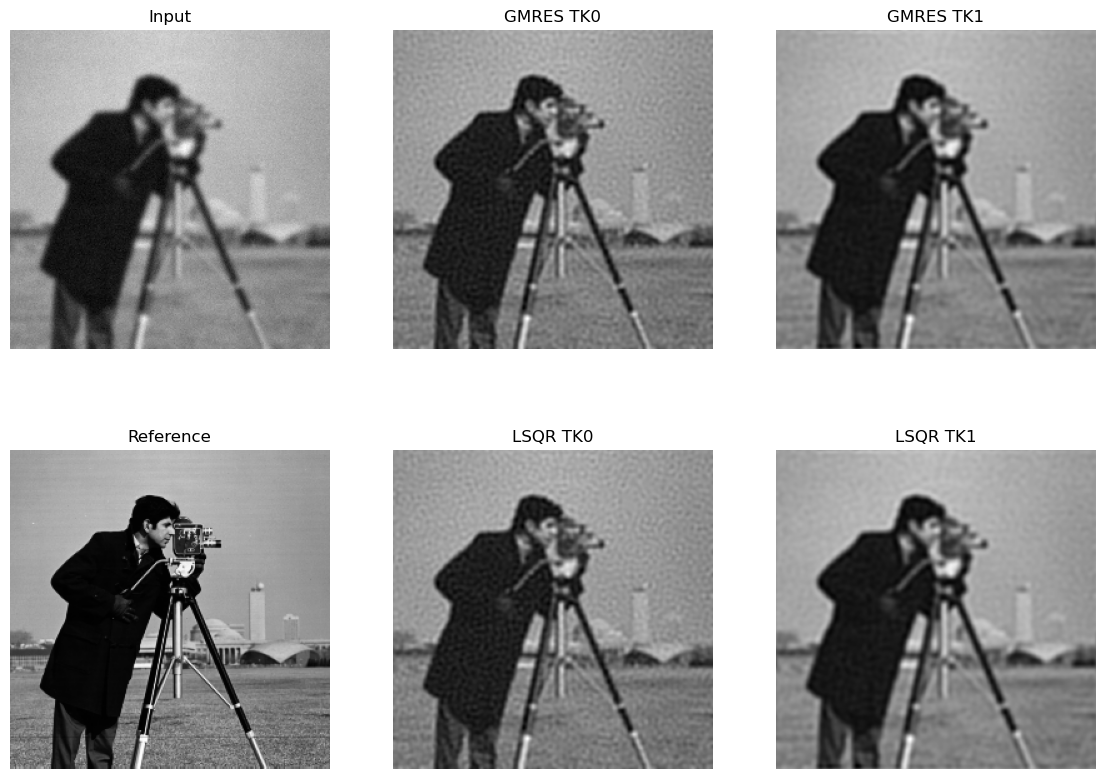

In [9]:
"""Compare different techniques"""

_, axs = plt.subplots(2, 3, figsize=(14, 10))
axs[0, 0].imshow(g, cmap="gray")
axs[0, 0].set_title("Input")
axs[0, 0].axis("off")
axs[0, 1].imshow(gmres_tk0_f_hat, cmap="gray")
axs[0, 1].set_title("GMRES TK0")
axs[0, 1].axis("off")
axs[0, 2].imshow(gmres_tk1_f_hat, cmap="gray")
axs[0, 2].set_title("GMRES TK1")
axs[0, 2].axis("off")
axs[1, 0].imshow(f, cmap="gray")
axs[1, 0].set_title("Reference")
axs[1, 0].axis("off")
axs[1, 1].imshow(lsqr_tk0_f_hat, cmap="gray")
axs[1, 1].set_title("LSQR TK0")
axs[1, 1].axis("off")
axs[1, 2].imshow(lsqr_tk1_f_hat, cmap="gray")
axs[1, 2].set_title("LSQR TK1")
axs[1, 2].axis("off")
plt.show()